In [2]:
import matplotlib.pyplot as plt

In [3]:
x = [10,20,30,40,50]
y = [1,2,3,4,5]

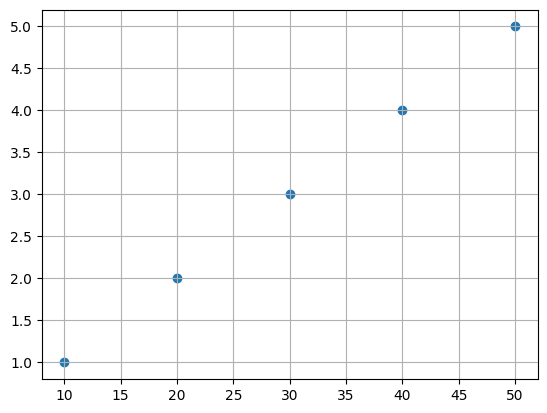

In [4]:
# plt.plot(x,y)
plt.scatter(x,y)
# plt.bar(x,y)
plt.grid(True)
plt.show()


In [5]:
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# import numpy as np

# # Step 1: Input data
# X = np.array([[1], [2], [3], [4], [5], [6]])
# Y = np.array([2.5, 2, 2.4, 4.5, 3, 5])

# # Step 2: Train the model
# model = LinearRegression()
# model.fit(X, Y)

# # Step 3: Predict values
# x_vals = np.linspace(1, 6, 100).reshape(-1, 1)
# y_vals = model.predict(x_vals)

# # Step 4: Plot setup
# plt.figure(figsize=(10, 6))

# # Data points
# plt.scatter(X, Y, color='blue', label='Data Points')

# # Regression line
# plt.plot(x_vals, y_vals, color='green', label='Regression Line')

# # Prediction point
# x_pred = 3.5
# y_pred = model.predict([[x_pred]])
# plt.scatter([x_pred], y_pred, color='red', label=f'Prediction (x={x_pred})')

# # Annotating slope and intercept
# slope = model.coef_[0]
# intercept = model.intercept_

# # Draw slope arrow between two points to show "weight"
# x1, x2 = 2, 4
# y1, y2 = model.predict([[x1]])[0], model.predict([[x2]])[0]
# plt.annotate('', xy=(x2, y2), xytext=(x1, y1),
#              arrowprops=dict(arrowstyle='<->', color='purple', lw=2))
# plt.text((x1+x2)/2, (y1+y2)/2 + 0.3, f'Slope (Weight) = {slope:.2f}', color='purple', fontsize=10, ha='center')

# # Label each data point
# for i in range(len(X)):
#     plt.text(X[i][0] + 0.1, Y[i] + 0.1, f'({X[i][0]}, {Y[i]})', fontsize=9)

# # Add intercept line
# plt.axhline(intercept, color='orange', linestyle='--', label=f'Intercept = {intercept:.2f}')

# # Final plot touches
# plt.xlabel("X (Feature/Input)")
# plt.ylabel("Y (Target/Output)")
# plt.title("Linear Regression Visualization with Labels")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [7]:
# Step 1: Small Dataset
X = np.array([[30], [40], [50], [60], [70]])    # Size in 100 sq.ft
Y = np.array([[65], [70], [75], [85], [95]])    # Price in lakhs


In [8]:
# Step 2: Train the Model
model = LinearRegression()
model.fit(X, Y)
# new_size = np.array([[120]])


# Step 3: Predictions
Y_pred = model.predict(X)


In [9]:
# new_size = np.array([[120]])
new_size = np.array([[55]])
predicted_price = model.predict(new_size)

In [10]:
# Step 5: Output model parameters and prediction
print("Slope (Weight):", model.coef_[0][0])
print("Intercept (Bias):", model.intercept_[0])
print("Mean Squared Error (MSE):", mean_squared_error(Y, Y_pred))
print(f"Predicted price for 55 (100 sq.ft): {predicted_price[0][0]:.2f} lakhs")
# print(f"Predicted price for 120 (100 sq.ft): {predicted_price[0][0]:.2f} lakhs")

Slope (Weight): 0.75
Intercept (Bias): 40.5
Mean Squared Error (MSE): 3.5
Predicted price for 55 (100 sq.ft): 81.75 lakhs


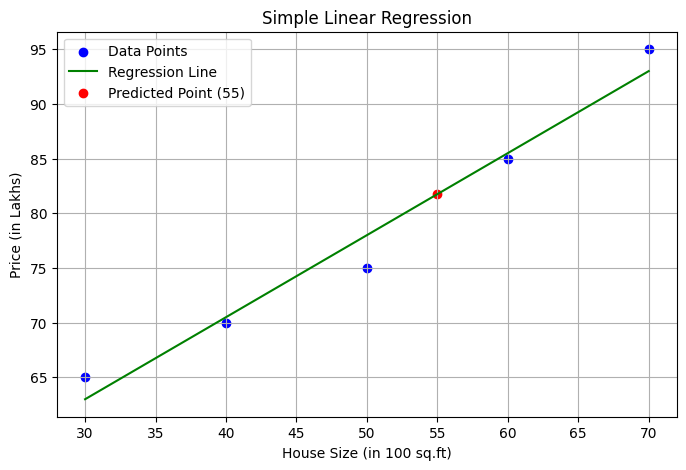

In [11]:

# Step 6: Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='green', label='Regression Line')

plt.scatter(new_size, predicted_price, color='red', label='Predicted Point (55)')

plt.xlabel('House Size (in 100 sq.ft)')
plt.ylabel('Price (in Lakhs)')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

LR COmplete Model With STEPS

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


<h1>1. Data Gathering </h1>

In [4]:
#1. data gathering
data = {
    'Size' : [30,40,50,60,70,80,90],
    'Age' : [10, 15, 20, None, 12, 8, 5],
    'Price' : [65, None, 75, 85, 95, 105, None]
}
dataframe = pd.DataFrame(data)


<h1>2. Data Processing & Cleaning </h1>

In [5]:
# # 2. data processing & cleaning
print("Missing Value are :\n", dataframe.isnull().sum()) # check the dataframe is null or note, isnull() == the none checker, sum() == number of none data
updated_DF = dataframe.fillna(0) # fill the dataframe as 0, those value is None 
updated_DF

# when the df is None that the data is going to mean
# #add the mean
# df_mean = dataframe.fillna(dataframe.mean(numeric_only=False))
# print(df_mean)

# #add the median
# df_median = dataframe.fillna(dataframe.median(numeric_only=False))
# print(df_median)

# # add the mode
# df_mode = dataframe.fillna(dataframe.mode())
# print(df_mode)


Missing Value are :
 Size     0
Age      1
Price    2
dtype: int64


,Size,Age,Price
0,30,10.0,65.0
1,40,15.0,0.0
2,50,20.0,75.0
3,60,0.0,85.0
4,70,12.0,95.0
5,80,8.0,105.0
6,90,5.0,0.0


<h1> 3. Feature Engineering </h1>

In [6]:
x = updated_DF[['Size', 'Age']] # Features # Independent Var
y = updated_DF[['Price']] # Target # Dependent Var

print(x)
print(y)

   Size   Age
0    30  10.0
1    40  15.0
2    50  20.0
3    60   0.0
4    70  12.0
5    80   8.0
6    90   5.0
   Price
0   65.0
1    0.0
2   75.0
3   85.0
4   95.0
5  105.0
6    0.0


<h1> 4. Model Def and Training </h1>

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, train_size=0.8, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

# the entire data set is divide in the 20:80 ratio, where testsize = 20, and train size is 80,
# the x = 80 & 8.0 with y = 105 so for that 80:8.0 == 105
# print(x_train, y_train)
# print(x_test, y_test)

LinearRegression()

<h1> 5. Model Validation & Evaluation</h1>

In [8]:
# y_pred = model.predict(x_test)
# y_pred
x_test = [[100,30]]
y_pred = model.predict(x_test)
y_pred

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[25.93095768]])